<a href="https://colab.research.google.com/github/AbiyyuFathin/PyTorch-MNIST-Prediction/blob/main/Test_AI_Delameta_Abiyyu_Fathin_Derian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abiyyu Fathin Derian
------------------------

## Import Library

In [11]:
# Import basic library
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Import PyTorch library
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim

## Load Dataset

In [12]:
# load and normalize the dataset
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [13]:
# Split the training and testing datset
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 50, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size = 50, shuffle=True)

## Explore The Dataset

In [14]:
# Iterate the training dataset
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Show the dimension of the dataset
print(images.shape)
print(labels.shape)

torch.Size([50, 1, 28, 28])
torch.Size([50])


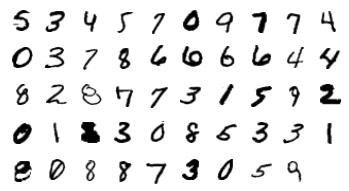

In [16]:
# Visualize the sample of dataset in one batch
figure = plt.figure()
num_of_images = 49
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

## Artificial Neural Network Modelling

In [17]:
# Define the ANN model with 2 hidden layers
input_size = 784
hidden_sizes = [100, 50]
output_size = 10

# Run the ANN model
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
# Show the model output
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [18]:
# Set loss function using cross entropy
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
logps = model(images)
loss = criterion(logps, labels) 

In [19]:
# Use backward to update the weight
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        ...,
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001]])


## Train The Dataset using ANN Model

In [21]:
# Set the optimizer using Adam with learning rate 0.001
optimizer = optim.Adam(model.parameters(), lr=0.001)
time0 = time()

# Set the usable list variable
loss_list = []
iteration_list = []
count = 0

# Set the epoch to 20 times
epochs = 20

# Loop the training dataset and get its training loss
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()

        count += 1

        # store loss and iteration
        loss_list.append(loss.data.item())
        iteration_list.append(count)
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.39132879811649524
Epoch 1 - Training loss: 0.19598746386356652
Epoch 2 - Training loss: 0.1462512704761078
Epoch 3 - Training loss: 0.11987622254760937
Epoch 4 - Training loss: 0.10150523518600191
Epoch 5 - Training loss: 0.09286160123961357
Epoch 6 - Training loss: 0.08203010129160247
Epoch 7 - Training loss: 0.07379360621591331
Epoch 8 - Training loss: 0.06608186289323688
Epoch 9 - Training loss: 0.06320625369757181
Epoch 10 - Training loss: 0.05710700856841868
Epoch 11 - Training loss: 0.05313688200665638
Epoch 12 - Training loss: 0.04951316775666783
Epoch 13 - Training loss: 0.04803476115726274
Epoch 14 - Training loss: 0.04345956722718256
Epoch 15 - Training loss: 0.042071626178124766
Epoch 16 - Training loss: 0.04067937522944097
Epoch 17 - Training loss: 0.03744155794480927
Epoch 18 - Training loss: 0.036766663514693695
Epoch 19 - Training loss: 0.03379969581204629

Training Time (in minutes) = 4.116016785303752


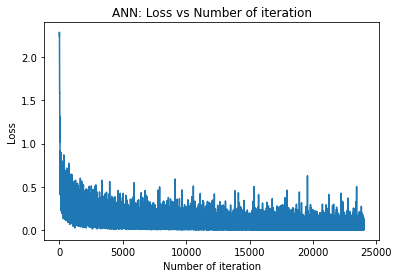

In [22]:
# visualization training loss loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Training Loss vs Number of iteration")
plt.show()

In [28]:
# Set the usable variable
correct_count, all_count = 0, 0
iteration_list = []
accuracy_list = []
count = 0

# Set the epoch to 20 times
epochs = 20

# Loop the training dataset and get its accuracy
for e in range(epochs):
  for images,labels in trainloader:
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      # Turn off gradients to speed up this part
      with torch.no_grad():
          logps = model(img)

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      probab = list(ps.numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

      accuracy = (correct_count/all_count) 

      count += 1

      # store accuracy and iteration
      accuracy_list.append(accuracy)
      iteration_list.append(count)

  else:
      print("Epoch {} - Accuracy: {}".format(e, accuracy))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Accuracy: 0.9919666666666667
Epoch 1 - Accuracy: 0.9919666666666667
Epoch 2 - Accuracy: 0.9919666666666667
Epoch 3 - Accuracy: 0.9919666666666667
Epoch 4 - Accuracy: 0.9919666666666667
Epoch 5 - Accuracy: 0.9919666666666667
Epoch 6 - Accuracy: 0.9919666666666667
Epoch 7 - Accuracy: 0.9919666666666667
Epoch 8 - Accuracy: 0.9919666666666667
Epoch 9 - Accuracy: 0.9919666666666667
Epoch 10 - Accuracy: 0.9919666666666667
Epoch 11 - Accuracy: 0.9919666666666667
Epoch 12 - Accuracy: 0.9919666666666667
Epoch 13 - Accuracy: 0.9919666666666667
Epoch 14 - Accuracy: 0.9919666666666667
Epoch 15 - Accuracy: 0.9919666666666667
Epoch 16 - Accuracy: 0.9919666666666667
Epoch 17 - Accuracy: 0.9919666666666667
Epoch 18 - Accuracy: 0.9919666666666667
Epoch 19 - Accuracy: 0.9919666666666667

Training Time (in minutes) = 25.85159213542938


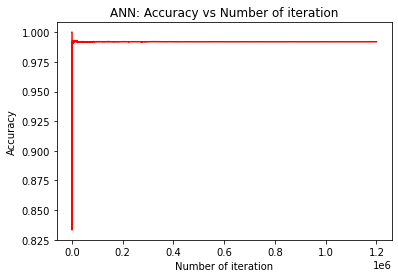

In [29]:
# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()

## Test and Evaluate The Testing Dataset

In [30]:
# Set th eusable variable
correct_count, all_count = 0, 0

# Loop the testing dataset and get its final accuracy
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

    accuracy = (correct_count/all_count) * 100.0

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", accuracy)

Number Of Images Tested = 10000

Model Accuracy = 97.47
